In [8]:
import time

**Разложение на простые множители**

Вывести разложение натурального числа n на простые множители. Простые множители должны быть упорядочены по возрастанию и разделены пробелами.
$2 ≤ n ≤ 10^6$.

In [156]:
n = int(input())
k = n
ans = []
start = time.time()
for i in range(2, int(k**0.5) + 1):
    if n == 1:
        break
    while n % i == 0:
        n = n / i
        ans.append(i)
if n == k:
    ans.append(n)
end = time.time()
print(' '.join(str(c) for c in ans))
print(end - start)

7 7
0.0002758502960205078


**Максимальная сумма**

Даны два массива целых чисел одинаковой длины A[0..n-1] и B[0..n-1]. Необходимо найти первую пару индексов i0 и j0, i0 ≤ j0, такую что A[i0] + B[j0] = max {A[i] + B[j], где 0 <= i < n, 0 <= j < n, i <= j}. Время работы - O(n).
n ≤ 100000.

In [157]:
n = int(input())
a = list(map(int, input().split()))
b = list(map(int, input().split()))
ans_val = a[0] + b[0]
ans_i = 0
ans_j = 0
max_a = a[0] - 1
i = 0
for j in range(n):
    if a[i] > max_a:
        max_a = a[i]
        max_i = i
    if max_a + b[j] > ans_val:
        ans_val = max_a + b[j]
        ans_i = max_i
        ans_j = j
    i += 1
print(' '.join(str(num) for num in a))
print(' '.join(str(num) for num in b))
print(ans_val, ans_i, ans_j)

1
1
2 0 0


**Цикл минимальной длины**

Дан невзвешенный неориентированный граф. Найдите цикл минимальной длины.
Ввод: v:кол-во вершин(макс. 50000), n:кол-во ребер(макс. 200000), n пар реберных вершин
Вывод: одно целое число равное длине минимального цикла. Если цикла нет, то вывести -1.

In [34]:
from queue import Queue

if __name__ == "__main__":

    def bfs(s):
        q = Queue()
        q.put(s)
        d = [float('inf')] * n
        d[s] = 0
        p = [None] * n
        while not q.empty():
            u = q.get()
            for v in adj_list[u]:
                if d[v] == float('inf'):
                    d[v] = d[u] + 1
                    p[v] = u
                    q.put(v)
                elif v == s:
                    cycle = []
                    cur = u
                    while cur is not None:
                        cycle.append(cur)
                        cur = p[cur]
                    return cycle[::-1]
        return []


    # Считывание графа
    n, m = map(int, input().split())
    adj_list = [set() for _ in range(n)]
    for _ in range(m):
        u, v = map(int, input().split())
        adj_list[u].add(v)

    # Shortest cycle
    shortest_cycle = []
    cycle_len = float('inf')
    for s in range(n):
        cycle = bfs(s)
        if cycle and len(cycle) < cycle_len:
            shortest_cycle = cycle
            cycle_len = len(cycle)

    if cycle_len == float('inf'):
        print('NO')
    else:
        print(*shortest_cycle)

2 3 5 4


In [ ]:
from queue import Queue

# Считывание графа
n, m, s, t = map(int, input().split())
adj_list = [set() for _ in range(n)]
for _ in range(m):
    u, v = map(int, input().split())
    adj_list[u].add(v)
    adj_list[v].add(u)

# BFS
d = [float('inf')] * n
d[s] = 0
p = [None] * n
q = Queue()
q.put(s)
while not q.empty():
    u = q.get() # достаем вершину из очереди
    for v in adj_list[u]: # перебираем всех непосещенных соседей (расстояние до которых бесконечность)
        if d[v] == float('inf'):
            d[v] = d[u] + 1 # обновляем расстояние для соседа
            p[v] = u # добавляем u как предка вершины v
            q.put(v) # добавляем v в очередь
path = []
cur = t
while cur is not None:
    path.append(cur)
    cur = p[cur]

print(*path[::-1])

**Поиск выхода из лабиринта**

In [11]:
from queue import Queue
n, m = map(int, input().split())
a = []
for i in range(n):
    s = input()
    for j in range(m):
        if s[j] == 'S': start = [i, j]
        if s[j] == 'F': final = [i, j]
    a.append(s)
def bfs(a, n, m, start, final):
    d = [[float('inf') for _ in range(m)] for _ in range(n)]
    q = Queue()
    q.put([start[0], start[1]])
    d[start[0]][start[1]] = 0
    dx = [1, -1, 0, 0]
    dy = [0, 0, 1, -1]
    while not q.empty():
        x, y = map(int, q.get())
        for i in range(len(dx)):
            x_n, y_n = x + dx[i], y + dy[i]
            if (x_n < n and y_n < m and x_n > -1 and y_n > -1
                and d[x_n][y_n] == float('inf') and a[x_n][y_n] != '#'):
                d[x_n][y_n] = d[x][y] + 1
                q.put([x_n, y_n])
    return d[final[0]][final[1]]
print(bfs(a, n, m, start, final))

12


In [43]:
a = ['efuhe', 'sfa']
a[1][2]
d = [[float('inf') for _ in range(3)] for _ in range(4)]
d[1][1] = 0
print(d)

[[inf, inf, inf], [inf, 0, inf], [inf, inf, inf], [inf, inf, inf]]


**Чтение графа из файла**

In [2]:
f = open('graph.txt')
n, m = map(int, f.readline().split())
adj_list = [set() for _ in range(n)]
for line in f:
    u, v = map(int, line.split())
    adj_list[u].add(v)
    adj_list[v].add(u)
f.close()
print(adj_list)

[{1}, {0, 2}, {1, 3, 4}, {2, 4}, {2, 3}, {6}, {5}, set()]


**Поиск в глубину**

In [3]:
def dfs(adj_list, v, visited):
    visited[v] = 1
    for u in adj_list[v]:
        if visited[u] != 1:
            dfs(adj_list, u)

**Поиск компонент связности**


**Проверка наличия пути от S до E**

In [4]:
def dfs(adj_list, v, visited):
    visited[v] = 1
    for u in adj_list[v]:
        if visited[u] != 1:
            dfs(adj_list, u, visited)

start = 0
end = 3
visited = [0] * n
dfs(adj_list, start, visited)
print('YES') if visited[end] else print('NO')

YES


**Количество компонент связности**

In [6]:
def dfs(adj_list, v, visited):
    visited[v] = 1
    for u in adj_list[v]:
        if not visited[u]:
            dfs(adj_list, u, visited)

visited = [0] * n
cnt = 0
for v in range(n):
    if not visited[v]:
        dfs(adj_list, v, visited)
        cnt += 1
print(cnt)

3


**Раскраска компонент связности в разные цвета**

In [7]:
def dfs(adj_list, v, visited, component):
    visited[v] = component
    for u in adj_list[v]:
        if not visited[u]:
            dfs(adj_list, u, visited, component)

visited = [0] * n
component = 1
for v in range(n):
    if not visited[v]:
        dfs(adj_list, v, visited, component)
        component +=1
print(visited)

[1, 1, 1, 1, 1, 2, 2, 3]


**Чтение ориентированного графа**


In [1]:
f = open('oriented_graph.txt')
n, m = map(int, f.readline().split())
adj_list = [set() for _ in range(n)]
for line in f:
    u, v = map(int, line.split())
    adj_list[u].add(v)
f.close()
print(adj_list)

[{1}, {2}, {3}, {4}, {2}, {6}, set(), set()]


**Поиск цикла в ориентированном графе**

В графе есть цикл, если при обходе в глубину мы встретим вершину,
которую мы начали, но ещё не закончили обрабатывать.

In [2]:
cycle = False
def dfs(adj_list, v, visited):
    global cycle
    visited[v] = 1
    for u in adj_list[v]:
        if visited[u] == 1:
            cycle = True
        if visited[u] == 0:
            dfs(adj_list, u, visited)
    visited[v] = 2

visited = [0] * n
cycle = False
for v in range(n):
    if visited[v] == 0:
        dfs(adj_list, v, visited)
print(cycle)

True


**Восстановление пути**

In [7]:
def get_cycle(come_from, start, cycle):
    v = start
    cycle.append(start)
    while come_from[v] != start:
        cycle.append(come_from[v])
        v = come_from[v]
    return cycle.reverse()
def dfs(adj_list, v, visited, come_from, cycle):
    visited[v] = 1
    for u in adj_list[v]:
        if visited[u] == 1:
            come_from[u] = v
            get_cycle(come_from, u, cycle)
            return
        if visited[u] == 0:
            come_from[u] = v
            dfs(adj_list, u, visited, come_from, cycle)
            if len(cycle)!=0:
                return
    visited[v] = 2

visited = [0] * n
come_from = [-1] * n
cycle = []
for v in range(n):
    if visited[v] == 0:
        dfs(adj_list, v, visited, come_from, cycle)
print(cycle)

[3, 4, 2]


In [112]:
def f(a):
    a = 1
a = 0
f(a)
print(a)

0


**Поиск цикла в неориентированном графе**

**Чтение графа из файла**

In [8]:
f = open('graph.txt')
n, m = map(int, f.readline().split())
adj_list = [set() for _ in range(n)]
for line in f:
    u, v = map(int, line.split())
    adj_list[u].add(v)
    adj_list[v].add(u)
f.close()
print(adj_list)

[{1}, {0, 2}, {1, 3, 4}, {2, 4}, {2, 3}, {6}, {5}, set()]


In [9]:
cycle = False
def dfs(adj_list, v, visited, come_from):
    global cycle
    visited[v] = 1
    for u in adj_list[v]:
        if u == come_from:
            continue
        if visited[u] == 1:
            cycle = True
        if visited[u] == 0:
            dfs(adj_list, u, visited, v)
    visited[v] = 2

visited = [0] * n
cycle = False
for v in range(n):
    if visited[v] == 0:
        dfs(adj_list, v, visited, -1)
print(cycle)

True


In [10]:
def get_cycle(come_from, start, cycle):
    cycle.append(start)
    v = start
    while come_from[v] != start:
        cycle.append(come_from[v])
        v = come_from[v]
    return cycle
def dfs(adj_list, v, visited, come_from, cycle):
    visited[v] = 1
    for u in adj_list[v]:
        if u == come_from[v]:
            continue
        if visited[u] == 1:
            come_from[u] = v
            get_cycle(come_from, u, cycle)
            return
        if visited[u] == 0:
            come_from[u] = v
            dfs(adj_list, u, visited, come_from, cycle)
            if len(cycle)!=0:
                return
    visited[v] = 2

visited = [0] * n
come_from = [-1] * n
cycle = []
for v in range(n):
    if visited[v] == 0:
        dfs(adj_list, v, visited, come_from, cycle)
print(cycle)

[2, 4, 3]


**Проверка графа на двудольность** (раскраска в два цвета, два соседа раскрашены в разные цвета)

**Чтение графа из файла**

In [13]:
f = open('bipartite.txt')
n, m = map(int, f.readline().split())
adj_list = [set() for _ in range(n)]
for line in f:
    u, v = map(int, line.split())
    adj_list[u].add(v)
    adj_list[v].add(u)
f.close()
print(adj_list)

[{1, 3}, {0, 2}, {1, 4, 5}, {0, 6}, {8, 2, 6}, {8, 2}, {3, 4}, {8}, {4, 5, 7}]


In [14]:
isBipartite = True
def dfs(adj_list, v, visited, color):
    global isBipartite
    visited[v] = color
    for u in adj_list[v]:
        if visited[u] == 0:
            dfs(adj_list, u, visited, 3 - color)
        elif visited[u] == color:
            isBipartite = False

visited = [0] * n
for v in range(n):
    if not visited[v]:
        dfs(adj_list, v, visited, 1)
        cnt += 1
print(isBipartite)

True


**Чтение графа из файла**

In [15]:
f = open('topological_sort.txt')
n, m = map(int, f.readline().split())
names = f.readline().split()
adj_list = [set() for _ in range(n)]
for line in f:
    u, v = map(int, line.split())
    u -= 1
    v -= 1
    adj_list[u].add(v)
f.close()
print(adj_list)

[{2, 4}, set(), {1}, set(), {1, 2, 5}, set(), {5}]


**Топологическая сортировка** (порядок надевания одежды)

In [16]:
def dfs(adj_list, v, visited, order):
    visited[v] = 1
    for u in adj_list[v]:
        if visited[u] == 0:
            dfs(adj_list, u, visited, order)
    order.append(v)
order = []
visited = [0] * n
for v in range(n):
    if not visited[v]:
        dfs(adj_list, v, visited, order)
for v in order[::-1]:
    print(names[v], end=' ')

socks glasses shirt pants shoes blazer coat 

**Поиск компонент сильной связности** (ориентированный граф)

In [159]:
a= [1, 3]
a[2-1]

3

In [10]:
from queue import Queue
import random
n, m = map(int, input().split())
a = []
def generate(n, m):
    x, y = random.randint(0, n), random.randint(0, m)

def bfs(a, n, m, start, final):
    d = [[float('inf') for _ in range(m)] for _ in range(n)]
    q = Queue()
    q.put([start[0], start[1]])
    d[start[0]][start[1]] = 0
    dx = [1, -1, 0, 0]
    dy = [0, 0, 1, -1]
    while not q.empty():
        x, y = map(int, q.get())
        for i in range(len(dx)):
            x_n, y_n = x + dx[i], y + dy[i]
            if (x_n < n and y_n < m and x_n > -1 and y_n > -1
                and d[x_n][y_n] == float('inf') and a[x_n][y_n] != '#'):
                d[x_n][y_n] = d[x][y] + 1
                q.put([x_n, y_n])
    return d[final[0]][final[1]]
print(bfs(a, n, m, [0, 0], [n-1, m-1]))

IndexError: list index out of range

In [8]:
import random
print(random.randint(1, 2))

1


In [3]:
from queue import Queue
# n, m = map(int, input().split())
a = []

# def generate(n, m):
#     return random.randint(0, n), random.randint(0, m)
# def read_f(a):
#     f = open('input.txt')
#     n, m, q = map(int, f.readline().split())
#     for line in f:
#         u, v = map(int, line.split())
#         u -= 1
#         v -= 1
#         a.append([u, v])
#     return n, m, q, a
def read(a):
    n, m, q = map(int, input().split())
    for i in range(q):
        u, v = map(int, input().split())
        u -= 1
        v -= 1
        a.append([u, v])
    return n, m, q, a

n, m, q, a = read(a)
b = [[0 for _ in range(m)] for _ in range(n)]
start = [0, 0]
final = [n-1, m-1]
def bfs(a, n, m, start, final):
    d = [[float('inf') for _ in range(m)] for _ in range(n)]
    q = Queue()
    q.put([start[0], start[1]])
    d[start[0]][start[1]] = 0
    dx = [1, -1, 0, 0]
    dy = [0, 0, 1, -1]
    while not q.empty():
        x, y = map(int, q.get())
        for i in range(len(dx)):
            x_n, y_n = x + dx[i], y + dy[i]
            if (x_n < n and y_n < m and x_n > -1 and y_n > -1
                and d[x_n][y_n] == float('inf') and a[x_n][y_n] != 1):
                d[x_n][y_n] = d[x][y] + 1
                q.put([x_n, y_n])
    return d[final[0]][final[1]]
# print(a)
for i in range(len(a)):
    b[a[i][0]][a[i][1]] = 1
    if bfs(b, n, m, start, final) == float('inf') or a[i][0] == 0 and a[i][1] == 0 or a[i][0] == n-1 and a[i][1] == m-1:
        print('YES')
        # for i in range(len(b)):
        #     print(b[i])
        b[a[i][0]][a[i][1]] = 0
    else:
        print('NO')

NO
YES
NO


In [27]:
from queue import Queue
import random
# n, m = map(int, input().split())
a = []
n, m, q = 10, 10, 100
# def generate(n, m, q):
#     f = open('input.txt', 'w')
#     f.write(str(n)+' '+str(m)+' '+str(q)+'\n')
#     for i in range(q):
#         f.write(str(random.randint(1, n))+' '+str(random.randint(1, m))+'\n')
# generate(n, m, q)   

def read_f(a):
    f = open('input.txt')
    n, m, q = map(int, f.readline().split())
    for line in f:
        u, v = map(int, line.split())
        u -= 1
        v -= 1
        a.append([u, v])
    return n, m, q, a
# def read(a):
#     n, m, q = map(int, input().split())
#     for i in range(q):
#         u, v = map(int, input().split())
#         u -= 1
#         v -= 1
#         a.append([u, v])
#     return n, m, q, a

n, m, q, a = read_f(a)
b = [[0 for _ in range(m)] for _ in range(n)]
start = [0, 0]
final = [n-1, m-1]
def bfs(a, n, m, start, final):
    d = [[float('inf') for _ in range(m)] for _ in range(n)]
    q = Queue()
    q.put([start[0], start[1]])
    d[start[0]][start[1]] = 0
    dx = [1, -1, 0, 0]
    dy = [0, 0, 1, -1]
    while not q.empty():
        x, y = map(int, q.get())
        for i in range(len(dx)):
            x_n, y_n = x + dx[i], y + dy[i]
            if (x_n < n and y_n < m and x_n > -1 and y_n > -1
                and d[x_n][y_n] == float('inf') and a[x_n][y_n] != 1):
                d[x_n][y_n] = d[x][y] + 1
                q.put([x_n, y_n])
    return d[final[0]][final[1]]
# print(a)
for i in range(len(a)):
    b[a[i][0]][a[i][1]] = 1
    if bfs(b, n, m, start, final) == float('inf') or a[i][0] == 0 and a[i][1] == 0 or a[i][0] == n-1 and a[i][1] == m-1:
        print('YES', a[i][0] + 1, a[i][1] + 1)
        # for i in range(len(b)):
        #     print(b[i])
        b[a[i][0]][a[i][1]] = 0
    else:
        print('NO', a[i][0] + 1, a[i][1] + 1)

NO 1 3
NO 4 1
NO 1 4
YES 4 4
NO 3 3
NO 3 1
NO 3 4
YES 4 3
NO 4 1
YES 3 2
NO 2 4
NO 1 3
NO 3 1
NO 1 3
YES 2 2
NO 2 4
YES 4 3
NO 2 3
NO 2 3
NO 1 3


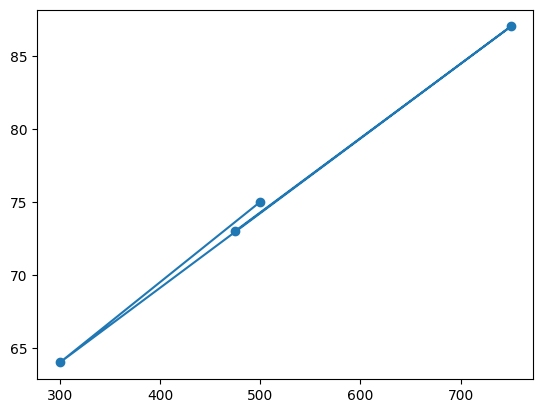

In [4]:
import matplotlib.pyplot as plt
x = [500, 300, 750, 475]
y = [75, 64, 87, 73]
plt.scatter(x, y)
plt.plot(x, y)